In [1]:
import sys
import os
sys.path.append(os.path.join(os.curdir, os.pardir, os.pardir))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import read_data
from net.Network import Network
from common.layer import Dense, Relu, Sigmoid, SoftmaxWithLoss
from optimizer.GradientDescent import GradientDescent

In [3]:
network = Network()
network.add(Dense(784, 50))
network.add(Relu())
network.add(Dense(50, 10))
network.build(SoftmaxWithLoss(), GradientDescent())

print(network.layers)
print(network.layers_cnt)

OrderedDict([('Dense_1', <common.layer.Dense object at 0x0000025571434E10>), ('Relu_1', <common.layer.Relu object at 0x0000025571434F28>), ('Dense_2', <common.layer.Dense object at 0x00000255714410B8>)])
{'Dense': 2, 'Relu': 1}


In [4]:
data_set = read_data(base_dir='../../mnist_data', one_hot=True)

reading ../../mnist_data\train-images-idx3-ubyte.gz
reading ../../mnist_data\t10k-images-idx3-ubyte.gz
reading ../../mnist_data\train-labels-idx1-ubyte.gz
reading ../../mnist_data\t10k-labels-idx1-ubyte.gz


In [5]:
num_iter = 10000
train_size = data_set.train.images.shape[0]
batch_size = 100
iter_per_epoch = max(train_size / batch_size, 1)

train_loss_history = []
train_acc_history = []
test_acc_history = []

In [6]:
optimizer = GradientDescent(learning_rate=0.1)

In [7]:
for i in range(1, num_iter + 1):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = data_set.train.images[batch_mask]
    y_batch = data_set.train.labels[batch_mask]
    
    grads = network.gradient(x_batch, y_batch)
    optimizer.update(network.params, grads)
    
    loss = network.loss(x_batch, y_batch)
    train_loss_history.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(data_set.train.images, data_set.train.labels)
        test_acc = network.accuracy(data_set.test.images, data_set.test.labels)
        print("iter: {}, train_acc = {:.4f}, test_acc = {:.4f}".format(i, train_acc, test_acc))
        train_acc_history.append(train_acc)
        test_acc_history.append(test_acc)

iter: 550, train_acc = 0.9023, test_acc = 0.9065
iter: 1100, train_acc = 0.9228, test_acc = 0.9252
iter: 1650, train_acc = 0.9346, test_acc = 0.9362
iter: 2200, train_acc = 0.9423, test_acc = 0.9438
iter: 2750, train_acc = 0.9475, test_acc = 0.9465
iter: 3300, train_acc = 0.9540, test_acc = 0.9517
iter: 3850, train_acc = 0.9567, test_acc = 0.9532
iter: 4400, train_acc = 0.9622, test_acc = 0.9583
iter: 4950, train_acc = 0.9643, test_acc = 0.9591
iter: 5500, train_acc = 0.9673, test_acc = 0.9609
iter: 6050, train_acc = 0.9694, test_acc = 0.9631
iter: 6600, train_acc = 0.9709, test_acc = 0.9655
iter: 7150, train_acc = 0.9731, test_acc = 0.9661
iter: 7700, train_acc = 0.9758, test_acc = 0.9671
iter: 8250, train_acc = 0.9758, test_acc = 0.9688
iter: 8800, train_acc = 0.9773, test_acc = 0.9696
iter: 9350, train_acc = 0.9774, test_acc = 0.9674
iter: 9900, train_acc = 0.9798, test_acc = 0.9694


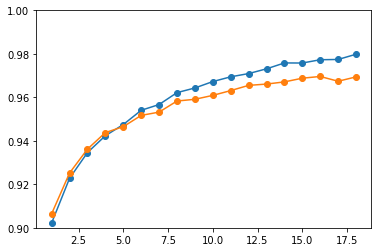

In [8]:
plt.figure()
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, marker='o')
plt.plot(epochs, test_acc_history, marker='o')
plt.ylim(0.90, 1)
plt.show()